In [173]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [174]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
from matplotlib.path import Path
import matplotlib.patches as patches

In [175]:
class individual(list):
    def __init__(self, data, crowding_distance=0):
        list.__init__(self, data)
        
        
        self.value = tuple(data)
        self.crowding_distance = crowding_distance
        self.Sp_set = []
        self.np=0
        self.rank = 0
    def addToNp(self):
        self.np += 1
    def subFromNp(self):
        self.np -= 1
    def addToSp(self,individual):
        self.Sp_set.append(individual)

In [176]:
def is_dominated(individual_p,individual_q):
    if individual_p == individual_q:
        return 0
    for i in range(len(individual_p)):
        if individual_p[i] > individual_q[i]:
            return 0
    return 1 

In [177]:
def fastNonDominatedSort(individuals):
    fronts = [[]]
    for individual_p in individuals:
        for individual_q in individuals:
        
            if is_dominated(individual_p,individual_q):
#                 print(is_dominated(individual_p,individual_q))
                individual_p.addToSp(individual_q)
                
            elif is_dominated(individual_q,individual_p):
                individual_p.addToNp()
                #print(individual_p,"的 np 为",individual_p.np)
                
                
                
        if individual_p.np == 0:
            individual_p.rank = 0
            fronts[0].append(individual_p)
    i = 0
    while fronts[i]:
        Q = []
        for individual_p in fronts[i]:
            for individual_q in individual_q.Sp_set:
                individual_q.subFromNp()
                if individual_q.np == 0:
                    individual_q.rank = i +1
                    Q.append(individual_q)
        #print(Q)
        i += 1
        fronts.append(Q)
    return fronts

In [180]:
def crowding_distance(individuals):
    I = len(individuals)
    for i in range(len(individuals[0])):
        individuals = sorted(individuals, key=lambda ind: ind[i], reverse=True)
        individuals[0].crowding_distance = 9999
        individuals[len(individuals)-1].crowding_distance=9999
        for j in range(1,I-1):
            individuals[j].crowding_distance = individuals[j].crowding_distance+abs(individuals[j-1][i]-individuals[j+1][i])/abs(individuals[0][i]-individuals[len(individuals)-1][i])

In [222]:
individuals = sorted(individuals, key=lambda ind: ind[0])
print(individuals)

[[1e-06, 1e-06, 1.0], [1e-06, 0.08333333333333333, 0.9166666666666666], [1e-06, 0.16666666666666666, 0.8333333333333334], [1e-06, 0.25, 0.75], [1e-06, 0.3333333333333333, 0.6666666666666666], [1e-06, 0.4166666666666667, 0.5833333333333334], [1e-06, 0.5, 0.5], [1e-06, 0.5833333333333334, 0.4166666666666667], [1e-06, 0.6666666666666666, 0.3333333333333333], [1e-06, 0.75, 0.25], [1e-06, 0.8333333333333334, 0.16666666666666666], [1e-06, 0.9166666666666666, 0.08333333333333333], [1e-06, 1.0, 1e-06], [0.08333333333333333, 1e-06, 0.9166666666666666], [0.08333333333333333, 0.08333333333333333, 0.8333333333333334], [0.08333333333333333, 0.16666666666666666, 0.75], [0.08333333333333333, 0.25, 0.6666666666666666], [0.08333333333333333, 0.3333333333333333, 0.5833333333333334], [0.08333333333333333, 0.4166666666666667, 0.5], [0.08333333333333333, 0.5, 0.4166666666666667], [0.08333333333333333, 0.5833333333333334, 0.3333333333333333], [0.08333333333333333, 0.6666666666666666, 0.25], [0.0833333333333

In [210]:
# def crowding_distance(individuals):
#     for i in range(len(individuals)):
#         sorted_by_f1 = sorted(individuals, key=lambda ind: ind[0])
#         sorted_by_f2 = sorted(individuals, key=lambda ind: ind[1])
#         sorted_by_f3 = sorted(individuals, key=lambda ind: ind[2])
#         index_of_f1 = sorted_by_f1.index(individuals[i])
#         index_of_f2 = sorted_by_f2.index(individuals[i])
#         index_of_f3 = sorted_by_f3.index(individuals[i])
#         if index_of_f1 != 0 and index_of_f2 != 0 and index_of_f3 != 0 and index_of_f1 != len(individuals)-1 and index_of_f2 != len(individuals)-1 and index_of_f3 != len(individuals)-1:
#             individuals[i].crowding_distance = sorted_by_f1[
#                 index_of_f1 -
#                 1][0] - sorted_by_f1[index_of_f1 + 1][0] + sorted_by_f2[
#                     index_of_f2 -
#                     1][1] - sorted_by_f2[index_of_f2 + 1][1] + sorted_by_f3[
#                         index_of_f3 - 1][2] - sorted_by_f3[index_of_f3 + 1][2]
#         else:
#             individuals[i].crowding_distance = 0

In [181]:
def sel_nsga_ii(individuals, no_of_pop):
    fronts = fastNonDominatedSort(individuals)
    limit = 0
    res = []
    for f, front in enumerate(fronts):
        res += front
        if len(res) > no_of_pop:
            limit = f
            break
    selection = []
    if limit > 0:
        for f in range(limit):
            selection += fronts[f]
            #print(selection)
    # complete selected inividuals using the referece point based approach
    crowding_distance(fronts[limit])
    amount = no_of_pop - len(selection)
    selection += sorted(fronts[limit],key = lambda ind:ind.crowding_distance,reverse=True)[:amount]
    return selection

In [258]:
inds = [[1e-06, 1e-06, 1.0],
 [1e-06, 0.08333333333333333, 0.9166666666666666],
 [1e-06, 0.16666666666666666, 0.8333333333333334],
 [1e-06, 0.25, 0.75],
 [1e-06, 0.3333333333333333, 0.6666666666666666],
 [1e-06, 0.4166666666666667, 0.5833333333333334],
 [1e-06, 0.5, 0.5],
 [1e-06, 0.5833333333333334, 0.4166666666666667],
 [1e-06, 0.6666666666666666, 0.3333333333333333],
 [1e-06, 0.75, 0.25],
 [1e-06, 0.8333333333333334, 0.16666666666666666],
 [1e-06, 0.9166666666666666, 0.08333333333333333],
 [1e-06, 1.0, 1e-06],
 [0.08333333333333333, 1e-06, 0.9166666666666666],
 [0.08333333333333333, 0.08333333333333333, 0.8333333333333334],       
 [0.08333333333333333, 0.16666666666666666, 0.75],
 [0.08333333333333333, 0.25, 0.6666666666666666],
 [0.08333333333333333, 0.3333333333333333, 0.5833333333333334],
 [0.08333333333333333, 0.4166666666666667, 0.5],
 [0.08333333333333333, 0.5, 0.4166666666666667],
 [0.08333333333333333, 0.5833333333333334, 0.3333333333333333],
 [0.08333333333333333, 0.6666666666666666, 0.25],
 [0.08333333333333333, 0.75, 0.16666666666666666],
 [0.08333333333333333, 0.8333333333333334, 0.08333333333333333],
 [0.08333333333333333, 0.9166666666666666, 1e-06],
 [0.16666666666666666, 1e-06, 0.8333333333333334],
 [0.16666666666666666, 0.08333333333333333, 0.75],
 [0.16666666666666666, 0.16666666666666666, 0.6666666666666666],
 [0.16666666666666666, 0.25, 0.5833333333333334],
 [0.16666666666666666, 0.3333333333333333, 0.5],
 [0.16666666666666666, 0.4166666666666667, 0.4166666666666667],
 [0.16666666666666666, 0.5, 0.3333333333333333],
 [0.16666666666666666, 0.5833333333333334, 0.25],
 [0.16666666666666666, 0.6666666666666666, 0.16666666666666666],
 [0.16666666666666666, 0.75, 0.08333333333333333],
 [0.16666666666666666, 0.8333333333333334, 1e-06],
 [0.25, 1e-06, 0.75],
 [0.25, 0.08333333333333333, 0.6666666666666666],
 [0.25, 0.16666666666666666, 0.5833333333333334],
 [0.25, 0.25, 0.5],
 [0.25, 0.3333333333333333, 0.4166666666666667],
 [0.25, 0.4166666666666667, 0.3333333333333333],
 [0.25, 0.5, 0.25],
 [0.25, 0.5833333333333334, 0.16666666666666666],
 [0.25, 0.6666666666666666, 0.08333333333333333],
 [0.25, 0.75, 1e-06],

 [0.3333333333333333, 0.08333333333333333, 0.5833333333333334],
        
 [0.3333333333333333, 1e-06, 0.6666666666666666],
        
 [0.3333333333333333, 0.16666666666666666, 0.5],
 [0.3333333333333333, 0.25, 0.4166666666666667],
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 [0.3333333333333333, 0.4166666666666667, 0.25],
 [0.3333333333333333, 0.5, 0.16666666666666666],
 [0.3333333333333333, 0.5833333333333334, 0.08333333333333333],
 [0.3333333333333333, 0.6666666666666666, 1e-06],
 [0.4166666666666667, 1e-06, 0.5833333333333334],
 [0.4166666666666667, 0.08333333333333333, 0.5],
 [0.4166666666666667, 0.16666666666666666, 0.4166666666666667],
 [0.4166666666666667, 0.25, 0.3333333333333333],
 [0.4166666666666667, 0.3333333333333333, 0.25],
 [0.4166666666666667, 0.4166666666666667, 0.16666666666666666],
 [0.4166666666666667, 0.5, 0.08333333333333333],
 [0.4166666666666667, 0.5833333333333334, 1e-06],
 [0.5, 1e-06, 0.5],
 [0.5, 0.08333333333333333, 0.4166666666666667],
 [0.5, 0.16666666666666666, 0.3333333333333333],
 [0.5, 0.25, 0.25],
 [0.5, 0.3333333333333333, 0.16666666666666666],
 [0.5, 0.4166666666666667, 0.08333333333333333],
 [0.5, 0.5, 1e-06],
 [0.5833333333333334, 1e-06, 0.4166666666666667],
 [0.5833333333333334, 0.08333333333333333, 0.3333333333333333],
 [0.5833333333333334, 0.16666666666666666, 0.25],
 [0.5833333333333334, 0.25, 0.16666666666666666],
 [0.5833333333333334, 0.3333333333333333, 0.08333333333333333],
 [0.5833333333333334, 0.4166666666666667, 1e-06],
 [0.6666666666666666, 1e-06, 0.3333333333333333],
 [0.6666666666666666, 0.08333333333333333, 0.25],
 [0.6666666666666666, 0.16666666666666666, 0.16666666666666666],
 [0.6666666666666666, 0.25, 0.08333333333333333],
 [0.6666666666666666, 0.3333333333333333, 1e-06],
 [0.75, 1e-06, 0.25],
 [0.75, 0.08333333333333333, 0.16666666666666666],
 [0.75, 0.16666666666666666, 0.08333333333333333],
 [0.75, 0.25, 1e-06],
 [0.8333333333333334, 1e-06, 0.16666666666666666],
 [0.8333333333333334, 0.08333333333333333, 0.08333333333333333],
 [0.8333333333333334, 0.16666666666666666, 1e-06],
 [0.9166666666666666, 1e-06, 0.08333333333333333],
 [0.9166666666666666, 0.08333333333333333, 1e-06],
 [1.0, 1e-06, 1e-06]]

In [259]:
individuals = []
for ind in inds:
    individuals.append(individual(ind))


In [260]:
final_pop = sel_nsga_ii(individuals, 36)

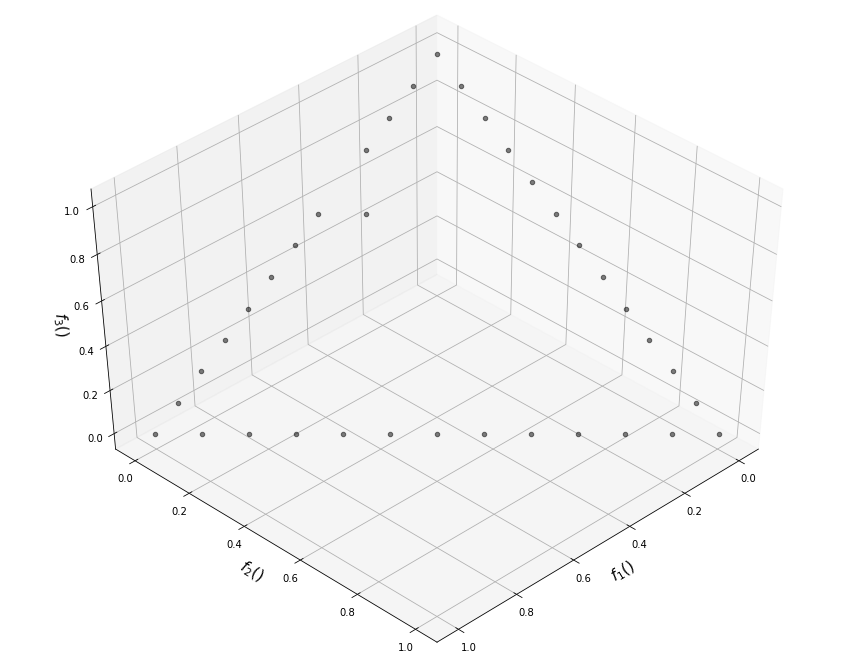

In [262]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

# the coordinate origin
#ax.scatter(0,0,0, c='k', marker='+', s=100)

for ind in final_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
    
#ax.scatter(0.3333333333333333, 1e-06, 0.6666666666666666,c="blue",alpha = 1)  
#ax.scatter(1e-06, 1.0, 1e-06,c="red",alpha = 1)
#ax.scatter(0.08333333333333333, 0.08333333333333333, 0.8333333333333334,c="red",alpha = 1)
# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=45, azim=45)
plt.autoscale(tight=True)

In [236]:
for ind in sorted(individuals,
                  key=lambda ind: ind.crowding_distance,
                  reverse=True):
    print(ind.crowding_distance, ind)

9999.083332416665 [1e-06, 1.0, 1e-06]
9999 [1e-06, 1e-06, 1.0]
9999 [1.0, 1e-06, 1e-06]
0.5000005000005001 [1e-06, 0.25, 0.75]
0.5000005000005001 [1e-06, 0.3333333333333333, 0.6666666666666666]
0.5000005000005001 [1e-06, 0.5, 0.5]
0.5000005000005001 [1e-06, 0.5833333333333334, 0.4166666666666667]
0.5000005000005001 [1e-06, 0.75, 0.25]
0.5000005000005001 [1e-06, 0.8333333333333334, 0.16666666666666666]
0.5000005000005001 [0.16666666666666666, 1e-06, 0.8333333333333334]
0.5000005000005001 [0.25, 1e-06, 0.75]
0.5000005000005001 [0.25, 0.75, 1e-06]
0.5000005000005001 [0.3333333333333333, 0.6666666666666666, 1e-06]
0.5000005000005001 [0.4166666666666667, 1e-06, 0.5833333333333334]
0.5000005000005001 [0.5, 1e-06, 0.5]
0.5000005000005001 [0.5, 0.5, 1e-06]
0.5000005000005001 [0.5833333333333334, 0.4166666666666667, 1e-06]
0.5000005000005001 [0.6666666666666666, 1e-06, 0.3333333333333333]
0.5000005000005001 [0.75, 1e-06, 0.25]
0.5000005000005001 [0.75, 0.25, 1e-06]
0.5000005000005001 [0.8333333

In [212]:
inds = np.loadtxt('3D-triangle.txt')
individuals = []
for ind in inds:
    individuals.append(individual(ind))

final_pop = sel_nsga_ii(individuals, 91)

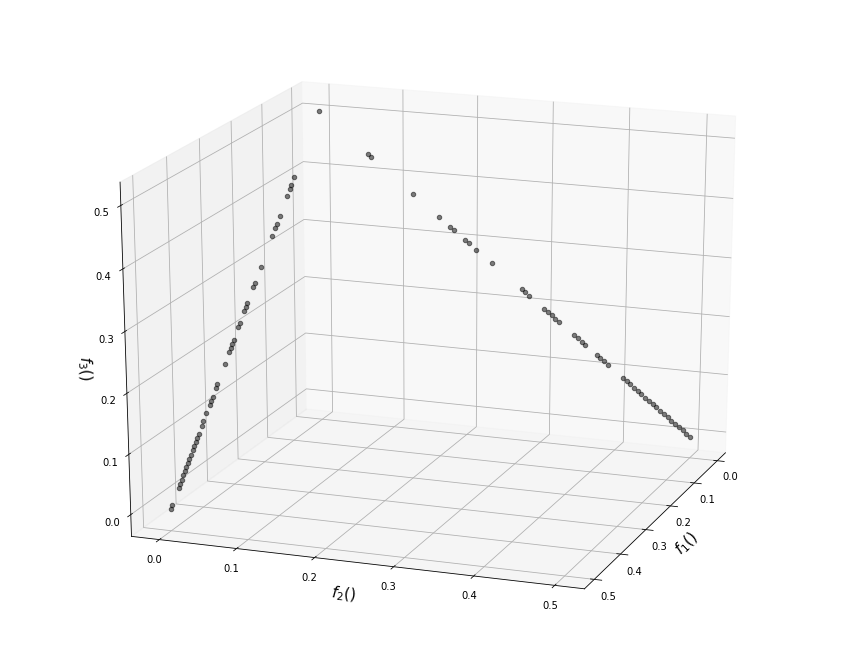

In [213]:
#Visualization of final pop of tri
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

# the coordinate origin
#ax.scatter(0,0,0, c='k', marker='+', s=100)

for ind in final_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
    


# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=20, azim=20)
plt.autoscale(tight=True)

In [26]:
inds = np.loadtxt('3D-star.txt')
individuals = []
for ind in inds:
    individuals.append(individual(ind))
final_pop = sel_nsga_ii(individuals, 400)

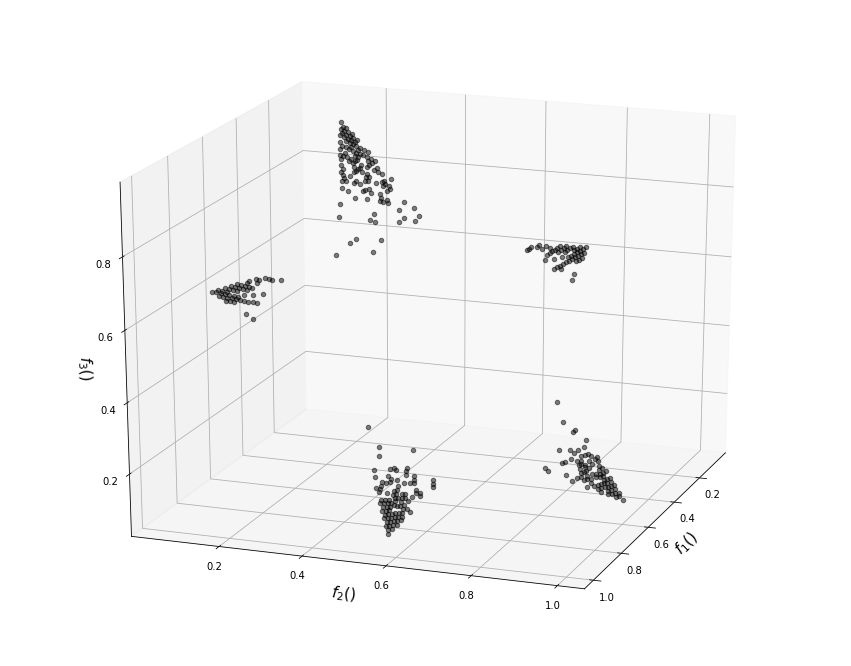

In [27]:
#Visualization of final pop of tri
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

# the coordinate origin
#ax.scatter(0,0,0, c='k', marker='+', s=100)

for ind in final_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
    


# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=20, azim=20)
plt.autoscale(tight=True)

In [25]:
inds = np.loadtxt('3D-circle.txt')
individuals = []
for ind in inds:
    individuals.append(individual(ind))
final_pop = sel_nsga_ii(individuals, 91)

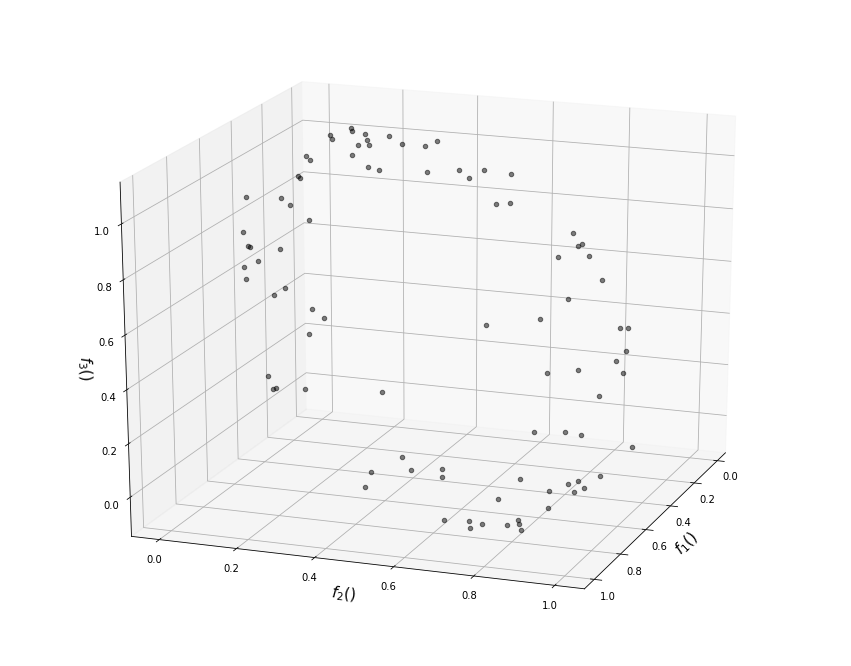

In [26]:
#Visualization of final pop of tri
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

# the coordinate origin
#ax.scatter(0,0,0, c='k', marker='+', s=100)

for ind in final_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
    


# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=20, azim=20)
plt.autoscale(tight=True)

In [27]:
inds = np.loadtxt('3D-quadrilateral.txt')
individuals = []
for ind in inds:
    individuals.append(individual(ind))
final_pop = sel_nsga_ii(individuals, 91)

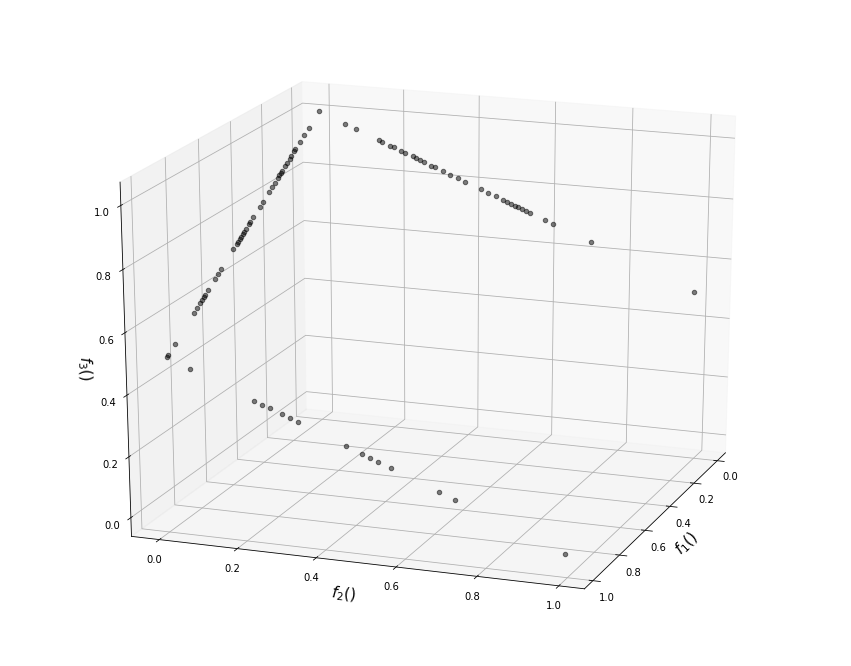

In [28]:
#Visualization of final pop of tri
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

# the coordinate origin
#ax.scatter(0,0,0, c='k', marker='+', s=100)

for ind in final_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
    


# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=20, azim=20)
plt.autoscale(tight=True)

In [29]:
inds = np.loadtxt('3D-lines.txt')
individuals = []
for ind in inds:
    individuals.append(individual(ind))
final_pop = sel_nsga_ii(individuals, 91)

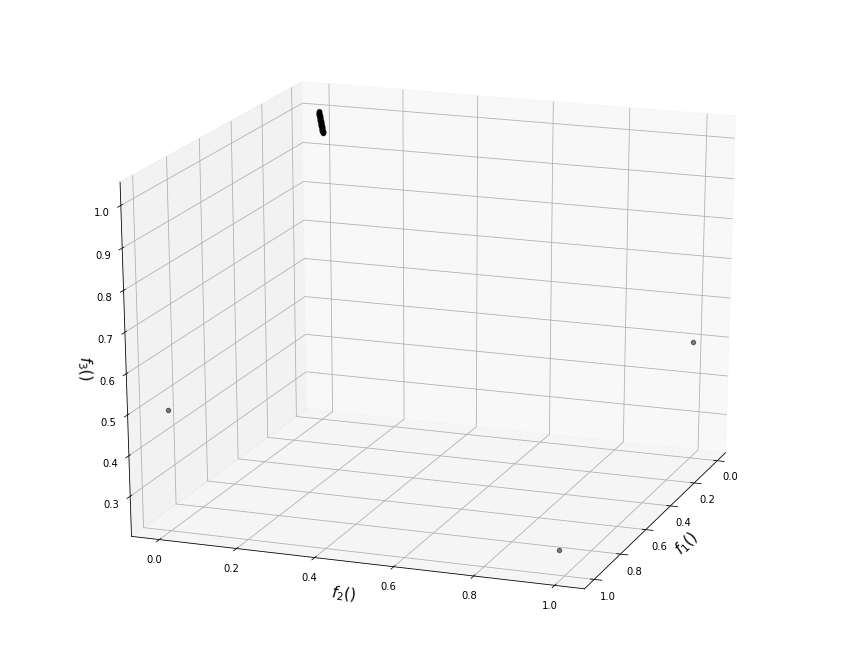

In [30]:
#Visualization of final pop of tri
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')

# the coordinate origin
#ax.scatter(0,0,0, c='k', marker='+', s=100)

for ind in final_pop:
    ax.scatter(ind[0],ind[1],ind[2],c="black",alpha=0.5)
    


# final figure details   
ax.set_xlabel('$f_1()$', fontsize=15)
ax.set_ylabel('$f_2()$', fontsize=15)
ax.set_zlabel('$f_3()$', fontsize=15)
ax.view_init(elev=20, azim=20)
plt.autoscale(tight=True)

In [ ]:
inds = np.loadtxt('3D-lines.txt')
individuals = []
for ind in inds:
    individuals.append(individual(ind))
final_pop = sel_nsga_ii(individuals, 91)